# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

This notebook includes interpolation of input values into 11 time points for each variable `mw_sqrt`, `mwc_sqrt`, `mcl_sqrt`, `mcr_sqrt`, `mm_sqrt`, and `ks_sqrt` based on a normalized `total_ms_sqrt` grouped by `sess`, `sid`, and `actv_grp`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Load the data from github repository

In [2]:
inputs_path_1 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p1.csv'
inputs_path_2 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p2.csv'
inputs_path_3 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p3.csv'
interim_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/interim_df.csv'
final_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_df.csv'
pts_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_points_lookup.csv'

In [3]:
inputs_p1 = pd.read_csv(inputs_path_1)

In [4]:
inputs_p2 = pd.read_csv(inputs_path_2)

In [5]:
inputs_p3 = pd.read_csv(inputs_path_3)

In [6]:
inputs_init = pd.concat([inputs_p1, inputs_p2, inputs_p3], ignore_index=True, axis=0)

In [7]:
interim_init = pd.read_csv(interim_path)

In [8]:
final_init = pd.read_csv(final_path)

In [9]:
pts_final_lookup = pd.read_csv(pts_path)

In [10]:
inputs_init.columns

Index(['sess', 'sid', 'start_dt', 'end_dt', 'exer', 'actv', 'actv_grp',
       'total_ms', 'idle_ms', 'mw', 'mwc', 'mcl', 'mcr', 'mm', 'ks',
       'total_ms_wdz', 'idle_ms_wdz', 'mw_wdz', 'mwc_wdz', 'mcl_wdz',
       'mcr_wdz', 'mm_wdz', 'ks_wdz', 'total_ms_sqrt', 'idle_ms_sqrt',
       'mw_sqrt', 'mwc_sqrt', 'mcl_sqrt', 'mcr_sqrt', 'mm_sqrt', 'ks_sqrt'],
      dtype='object')

In [11]:
interim_init.columns

Index(['sid', 'interim_scr2', 'interim_scr3', 'interim_scr4', 'interim_scr5',
       'interim_scr6'],
      dtype='object')

In [12]:
final_init.columns

Index(['sid', 'Es_1q1', 'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2',
       'Es_3q3', 'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2',
       'Es_5q3', 'Es_6q1', 'Es_6q2', 'final_score'],
      dtype='object')

In [13]:
pts_final_lookup.columns

Index(['question', 'question_points'], dtype='object')

In [14]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sess           227129 non-null  int64  
 1   sid            227129 non-null  int64  
 2   start_dt       227129 non-null  object 
 3   end_dt         227128 non-null  object 
 4   exer           227129 non-null  object 
 5   actv           227129 non-null  object 
 6   actv_grp       227129 non-null  object 
 7   total_ms       227128 non-null  float64
 8   idle_ms        226971 non-null  float64
 9   mw             227129 non-null  int64  
 10  mwc            227129 non-null  int64  
 11  mcl            227129 non-null  int64  
 12  mcr            227129 non-null  int64  
 13  mm             227129 non-null  int64  
 14  ks             227129 non-null  int64  
 15  total_ms_wdz   227129 non-null  float64
 16  idle_ms_wdz    227129 non-null  float64
 17  mw_wdz         227129 non-nul

In [15]:
inputs_init.isna().sum()

sess               0
sid                0
start_dt           0
end_dt             1
exer               0
actv               0
actv_grp           0
total_ms           1
idle_ms          158
mw                 0
mwc                0
mcl                0
mcr                0
mm                 0
ks                 0
total_ms_wdz       0
idle_ms_wdz        0
mw_wdz             0
mwc_wdz            0
mcl_wdz            0
mcr_wdz            0
mm_wdz             0
ks_wdz             0
total_ms_sqrt      1
idle_ms_sqrt     158
mw_sqrt            0
mwc_sqrt           0
mcl_sqrt           0
mcr_sqrt           0
mm_sqrt            0
ks_sqrt            0
dtype: int64

Convert date variables to datetime.

In [16]:
inputs_init['start_dt'] = pd.to_datetime(inputs_init['start_dt'])
inputs_init['end_dt'] = pd.to_datetime(inputs_init['end_dt'])

In [17]:
def get_var_list(df, lst):
    temp = []
    for s in lst:
        temp = [j for i in [temp, df.loc[:, df.columns.str.endswith(s)].columns] for j in i] 
    return temp

Create lists of variables.

In [18]:
sqrt_vars = get_var_list(inputs_init,['sqrt'])
sqrt_vars

['total_ms_sqrt',
 'idle_ms_sqrt',
 'mw_sqrt',
 'mwc_sqrt',
 'mcl_sqrt',
 'mcr_sqrt',
 'mm_sqrt',
 'ks_sqrt']

In [19]:
wdz_vars = get_var_list(inputs_init,['wdz'])
wdz_vars

['total_ms_wdz',
 'idle_ms_wdz',
 'mw_wdz',
 'mwc_wdz',
 'mcl_wdz',
 'mcr_wdz',
 'mm_wdz',
 'ks_wdz']

In [20]:
key_vars = ['sess','sid']

In [21]:
date_vars = get_var_list(inputs_init,['dt'])
date_vars

['start_dt', 'end_dt']

In [22]:
cat_vars = ['exer','actv_grp']

In [23]:
num_vars = inputs_init.select_dtypes('number').columns.to_list()
num_vars

['sess',
 'sid',
 'total_ms',
 'idle_ms',
 'mw',
 'mwc',
 'mcl',
 'mcr',
 'mm',
 'ks',
 'total_ms_wdz',
 'idle_ms_wdz',
 'mw_wdz',
 'mwc_wdz',
 'mcl_wdz',
 'mcr_wdz',
 'mm_wdz',
 'ks_wdz',
 'total_ms_sqrt',
 'idle_ms_sqrt',
 'mw_sqrt',
 'mwc_sqrt',
 'mcl_sqrt',
 'mcr_sqrt',
 'mm_sqrt',
 'ks_sqrt']

In [24]:
orig_vars = [v for v in num_vars if v not in key_vars + sqrt_vars + wdz_vars]
orig_vars

['total_ms', 'idle_ms', 'mw', 'mwc', 'mcl', 'mcr', 'mm', 'ks']

In [25]:
inputs_init.isna().sum()

sess               0
sid                0
start_dt           0
end_dt             1
exer               0
actv               0
actv_grp           0
total_ms           1
idle_ms          158
mw                 0
mwc                0
mcl                0
mcr                0
mm                 0
ks                 0
total_ms_wdz       0
idle_ms_wdz        0
mw_wdz             0
mwc_wdz            0
mcl_wdz            0
mcr_wdz            0
mm_wdz             0
ks_wdz             0
total_ms_sqrt      1
idle_ms_sqrt     158
mw_sqrt            0
mwc_sqrt           0
mcl_sqrt           0
mcr_sqrt           0
mm_sqrt            0
ks_sqrt            0
dtype: int64

### Restructure the inputs data

In [26]:
inputs_df = inputs_init[key_vars + date_vars + cat_vars + orig_vars].dropna(how='any').sort_values(by=key_vars + date_vars).copy()

In [27]:
inputs_df = inputs_init[key_vars + date_vars + cat_vars + orig_vars].dropna(how='any').sort_values(by=key_vars + date_vars).copy()

In [28]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226970 entries, 0 to 227128
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   sess      226970 non-null  int64         
 1   sid       226970 non-null  int64         
 2   start_dt  226970 non-null  datetime64[ns]
 3   end_dt    226970 non-null  datetime64[ns]
 4   exer      226970 non-null  object        
 5   actv_grp  226970 non-null  object        
 6   total_ms  226970 non-null  float64       
 7   idle_ms   226970 non-null  float64       
 8   mw        226970 non-null  int64         
 9   mwc       226970 non-null  int64         
 10  mcl       226970 non-null  int64         
 11  mcr       226970 non-null  int64         
 12  mm        226970 non-null  int64         
 13  ks        226970 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(8), object(2)
memory usage: 26.0+ MB


In [29]:
inputs_df.isna().sum()

sess        0
sid         0
start_dt    0
end_dt      0
exer        0
actv_grp    0
total_ms    0
idle_ms     0
mw          0
mwc         0
mcl         0
mcr         0
mm          0
ks          0
dtype: int64

In [30]:
inputs_df.describe()

,sess,sid,total_ms,idle_ms,mw,mwc,mcl,mcr,mm,ks
count,226970.000000,226970.000000,2.269700e+05,2.269700e+05,226970.000000,226970.000000,226970.000000,226970.000000,226970.000000,226970.000000
mean,3.693686,52.910746,1.585144e+04,1.144026e+06,2.703445,0.005454,7.075869,0.336644,414.525281,6.274939
std,1.769645,31.145046,6.110106e+04,2.977016e+07,27.103515,0.224617,21.564726,3.023394,1276.145685,50.923223
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000
50%,4.000000,53.000000,2.000000e+03,8.000000e+01,0.000000,0.000000,2.000000,0.000000,137.000000,0.000000
75%,5.000000,80.000000,9.000000e+03,5.739750e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000
max,6.000000,114.000000,3.861000e+06,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000


In [31]:
inputs_df.head(10)

,sess,sid,start_dt,end_dt,exer,actv_grp,total_ms,idle_ms,mw,mwc,mcl,mcr,mm,ks
0,1,1,2014-02-10 11:25:33,2014-02-10 11:25:34,Es,Other,1000.0,0.0,0,0,0,0,84,0
1,1,1,2014-02-10 11:25:35,2014-02-10 11:25:42,Es,Aulaweb,7000.0,218.0,0,0,4,0,397,0
2,1,1,2014-02-10 11:25:43,2014-02-10 11:25:43,Es,Blank,0.0,0.0,0,0,0,0,59,0
3,1,1,2014-02-10 11:25:44,2014-02-10 11:26:17,Es,Deeds,33000.0,154117.0,6,0,8,0,1581,4
4,1,1,2014-02-10 11:26:18,2014-02-10 11:26:18,Es,Other,0.0,0.0,0,0,2,0,103,0
5,1,1,2014-02-10 11:26:19,2014-02-10 11:26:27,Es,Other,8000.0,460.0,0,0,4,0,424,8
6,1,1,2014-02-10 11:26:28,2014-02-10 11:26:28,Es,Blank,0.0,0.0,0,0,1,0,93,0
7,1,1,2014-02-10 11:26:29,2014-02-10 11:26:29,Es,Deeds,0.0,0.0,0,0,1,0,75,0
8,1,1,2014-02-10 11:26:30,2014-02-10 11:26:33,Es,Aulaweb,3000.0,0.0,0,0,2,0,238,0
9,1,1,2014-02-10 11:26:34,2014-02-10 11:26:41,Es,Deeds,7000.0,4933.0,0,0,2,0,268,0


Create accumulating colums with square root variables.

In [32]:
inputs_df['total_ms_cum'] = inputs_df.groupby(['sess','sid'])['total_ms'].cumsum()

In [33]:
inputs_df['mw_cum'] = inputs_df.groupby(['sess','sid'])['mw'].cumsum()

In [34]:
inputs_df['mwc_cum'] = inputs_df.groupby(['sess','sid'])['mwc'].cumsum()

In [35]:
inputs_df['mcl_cum'] = inputs_df.groupby(['sess','sid'])['mcl'].cumsum()

In [36]:
inputs_df['mcr_cum'] = inputs_df.groupby(['sess','sid'])['mcr'].cumsum()

In [37]:
inputs_df['mm_cum'] = inputs_df.groupby(['sess','sid'])['mm'].cumsum()

In [38]:
inputs_df['ks_cum'] = inputs_df.groupby(['sess','sid'])['ks'].cumsum()

In [39]:
inputs_df.head(10)

,sess,sid,start_dt,end_dt,exer,actv_grp,total_ms,idle_ms,mw,mwc,...,mcr,mm,ks,total_ms_cum,mw_cum,mwc_cum,mcl_cum,mcr_cum,mm_cum,ks_cum
0,1,1,2014-02-10 11:25:33,2014-02-10 11:25:34,Es,Other,1000.0,0.0,0,0,...,0,84,0,1000.0,0,0,0,0,84,0
1,1,1,2014-02-10 11:25:35,2014-02-10 11:25:42,Es,Aulaweb,7000.0,218.0,0,0,...,0,397,0,8000.0,0,0,4,0,481,0
2,1,1,2014-02-10 11:25:43,2014-02-10 11:25:43,Es,Blank,0.0,0.0,0,0,...,0,59,0,8000.0,0,0,4,0,540,0
3,1,1,2014-02-10 11:25:44,2014-02-10 11:26:17,Es,Deeds,33000.0,154117.0,6,0,...,0,1581,4,41000.0,6,0,12,0,2121,4
4,1,1,2014-02-10 11:26:18,2014-02-10 11:26:18,Es,Other,0.0,0.0,0,0,...,0,103,0,41000.0,6,0,14,0,2224,4
5,1,1,2014-02-10 11:26:19,2014-02-10 11:26:27,Es,Other,8000.0,460.0,0,0,...,0,424,8,49000.0,6,0,18,0,2648,12
6,1,1,2014-02-10 11:26:28,2014-02-10 11:26:28,Es,Blank,0.0,0.0,0,0,...,0,93,0,49000.0,6,0,19,0,2741,12
7,1,1,2014-02-10 11:26:29,2014-02-10 11:26:29,Es,Deeds,0.0,0.0,0,0,...,0,75,0,49000.0,6,0,20,0,2816,12
8,1,1,2014-02-10 11:26:30,2014-02-10 11:26:33,Es,Aulaweb,3000.0,0.0,0,0,...,0,238,0,52000.0,6,0,22,0,3054,12
9,1,1,2014-02-10 11:26:34,2014-02-10 11:26:41,Es,Deeds,7000.0,4933.0,0,0,...,0,268,0,59000.0,6,0,24,0,3322,12


Create long format data frame with key variables (`sess` and `sid`), `actv_grp`, and accumulating columns (`mw_cum`, `mwc_cum`, `mcl_cum`, `mcr_cum`,`mm_cum`, and `ks_cum`).

In [40]:
cum_vars = get_var_list(inputs_df,['cum'])
cum_vars

['total_ms_cum', 'mw_cum', 'mwc_cum', 'mcl_cum', 'mcr_cum', 'mm_cum', 'ks_cum']

In [41]:
cum_df = inputs_df[key_vars + ['actv_grp'] + cum_vars].copy()

In [42]:
cum_lf = cum_df.melt(id_vars=key_vars + ['total_ms_cum']).copy()

Plot `total_ms_cum` by each mouse/key stroke variable for the first 5 students.

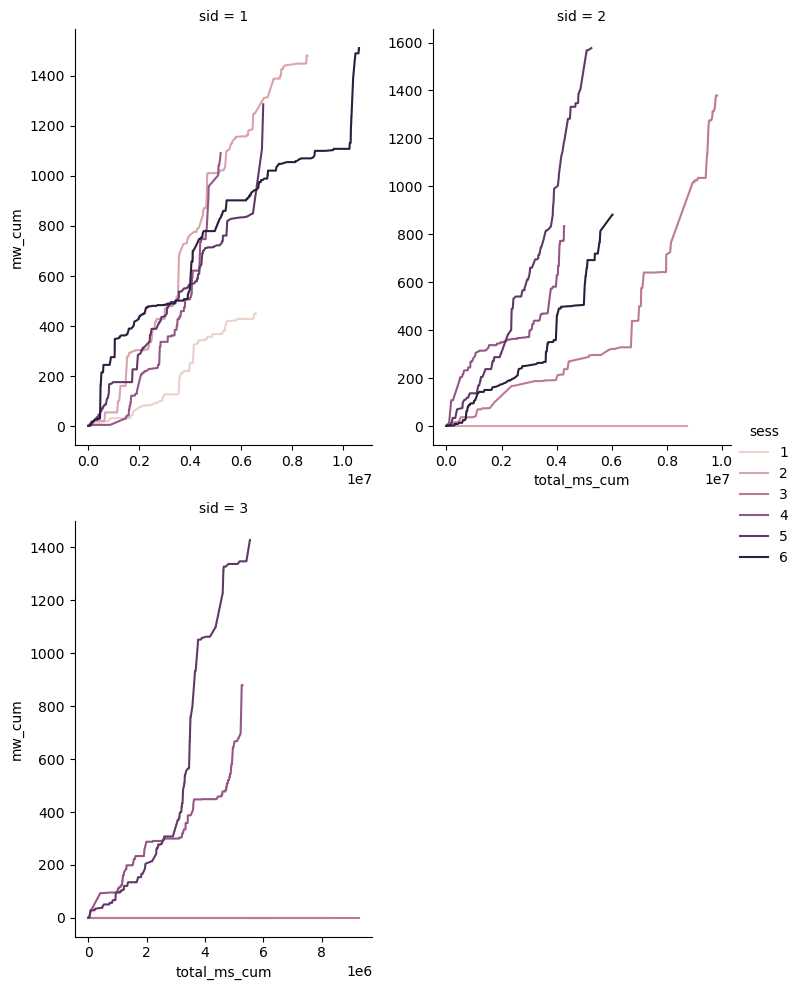

In [43]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'mw_cum') & (cum_lf['sid'].isin([1, 2, 3]))].rename(columns = {'value': 'mw_cum'}),
    x="total_ms_cum", y="mw_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

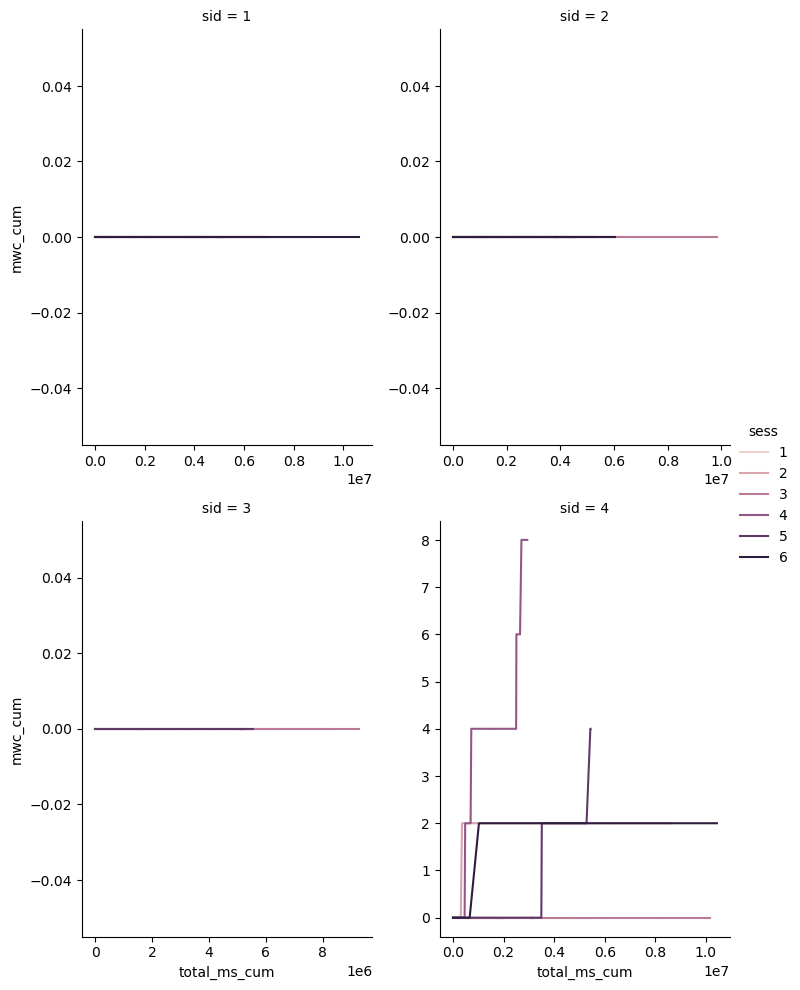

In [44]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'mwc_cum') & (cum_lf['sid'].isin([1, 2, 3, 4]))].rename(columns = {'value': 'mwc_cum'}),
    x="total_ms_cum", y="mwc_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

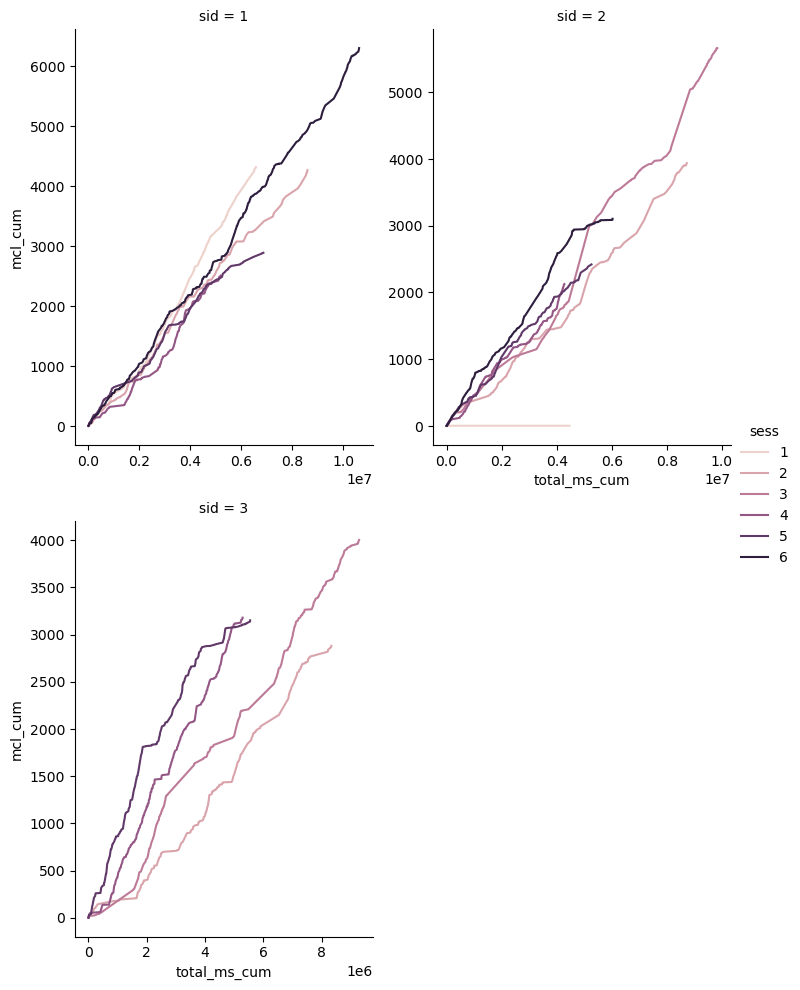

In [45]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'mcl_cum') & (cum_lf['sid'].isin([1, 2, 3]))].rename(columns = {'value': 'mcl_cum'}),
    x="total_ms_cum", y="mcl_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

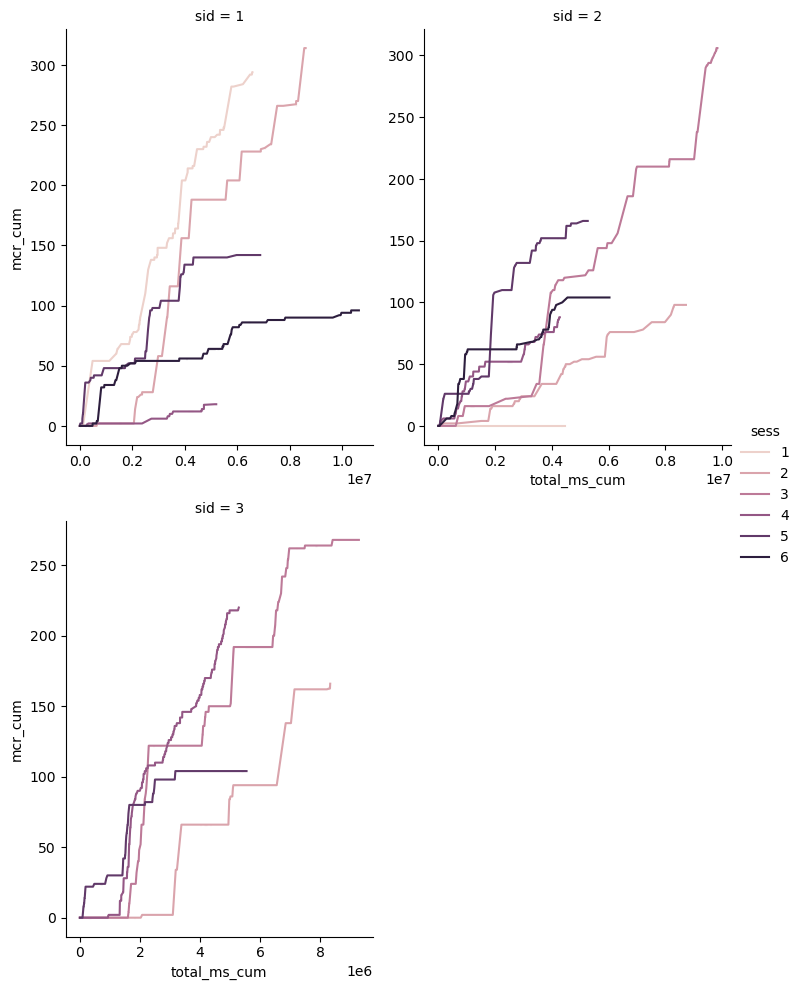

In [46]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'mcr_cum') & (cum_lf['sid'].isin([1, 2, 3]))].rename(columns = {'value': 'mcr_cum'}),
    x="total_ms_cum", y="mcr_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

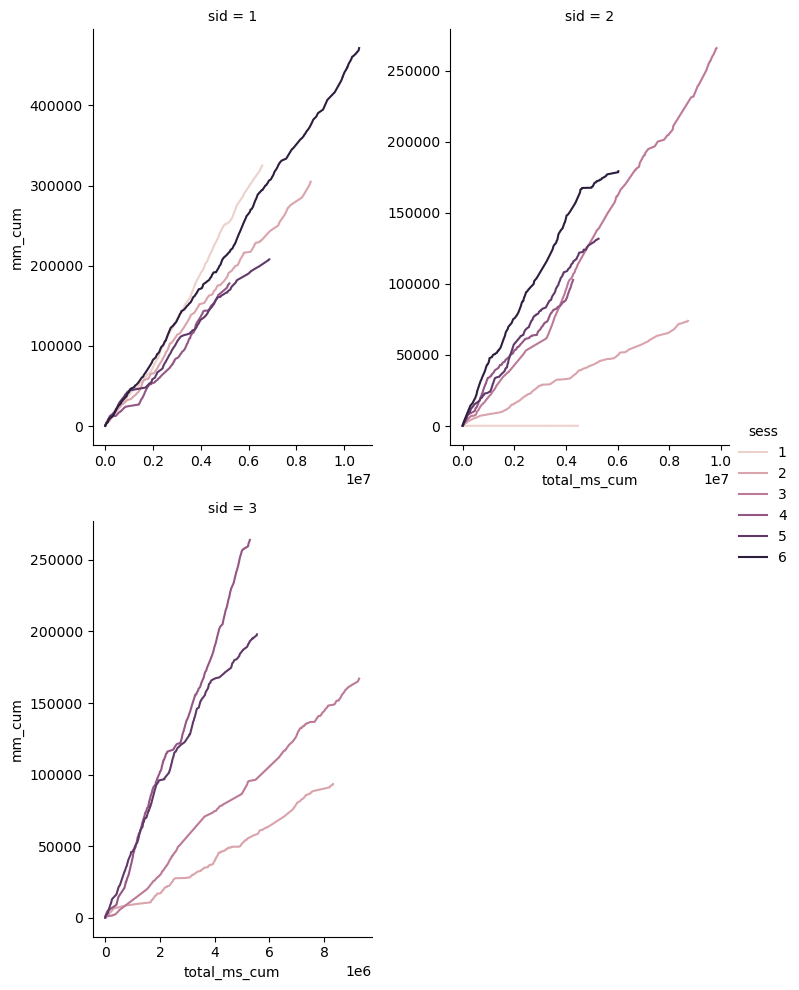

In [47]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'mm_cum') & (cum_lf['sid'].isin([1, 2, 3]))].rename(columns = {'value': 'mm_cum'}),
    x="total_ms_cum", y="mm_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

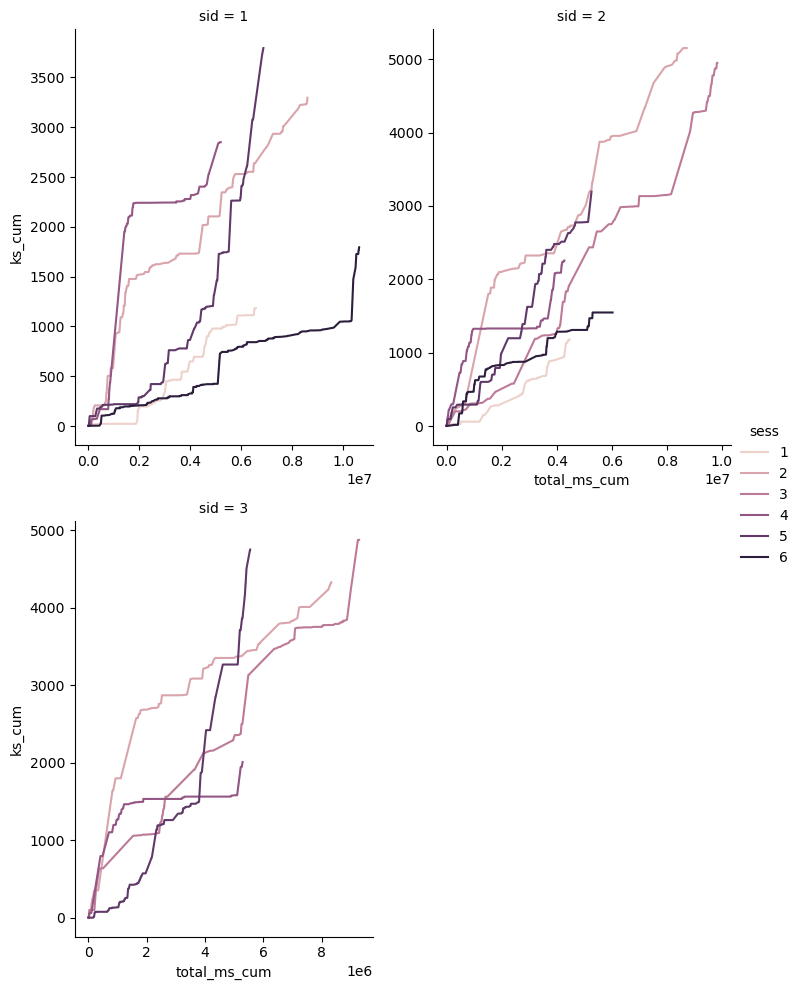

In [48]:
sns.relplot(
    data=cum_lf.loc[(cum_lf['variable'] == 'ks_cum') & (cum_lf['sid'].isin([1, 2, 3]))].rename(columns = {'value': 'ks_cum'}),
    x="total_ms_cum", y="ks_cum",
    hue="sess", col="sid", col_wrap=2,
    kind="line", height=5, aspect=.75, facet_kws={'sharey': False, 'sharex': False})

plt.show()

Create 11 time point variables for `total_ms_cum` by `sid`, `sess`, and `actv_grp`.

In [49]:
def p000(x):
    return x.quantile(0.00)

In [50]:
def p010(x):
    return x.quantile(0.10)

In [51]:
def p020(x):
    return x.quantile(0.20)

In [52]:
def p030(x):
    return x.quantile(0.30)

In [53]:
def p040(x):
    return x.quantile(0.40)

In [54]:
def p050(x):
    return x.median()

In [55]:
def p060(x):
    return x.quantile(0.60)

In [56]:
def p070(x):
    return x.quantile(0.70)

In [57]:
def p080(x):
    return x.quantile(0.80)

In [58]:
def p090(x):
    return x.quantile(0.90)

In [59]:
def p100(x):
    return x.quantile(1.00)

In [60]:
timepoints_df = cum_df.groupby(['sid','sess','actv_grp']).\
            aggregate(total_ms_tp000 = ('total_ms_cum', p000),
                      total_ms_tp010 = ('total_ms_cum', p010),
                      total_ms_tp020 = ('total_ms_cum', p020),
                      total_ms_tp030 = ('total_ms_cum', p030),
                      total_ms_tp040 = ('total_ms_cum', p040),
                      total_ms_tp050 = ('total_ms_cum', p050),
                      total_ms_tp060 = ('total_ms_cum', p060),
                      total_ms_tp070 = ('total_ms_cum', p070),
                      total_ms_tp080 = ('total_ms_cum', p080),
                      total_ms_tp090 = ('total_ms_cum', p090),
                      total_ms_tp100 = ('total_ms_cum', p100)).\
            reset_index().copy()

In [61]:
timepoints_df.head(42)

,sid,sess,actv_grp,total_ms_tp000,total_ms_tp010,total_ms_tp020,total_ms_tp030,total_ms_tp040,total_ms_tp050,total_ms_tp060,total_ms_tp070,total_ms_tp080,total_ms_tp090,total_ms_tp100
0,1,1,Aulaweb,8000.0,78700.0,1739200.0,1832200.0,2039600.0,2203500.0,2824200.0,3619300.0,4170800.0,5288700.0,6574000.0
1,1,1,Blank,8000.0,1861600.0,2157800.0,2293700.0,2960800.0,3673000.0,4017800.0,4284500.0,4748800.0,5383100.0,6566000.0
2,1,1,Deeds,41000.0,908800.0,2078800.0,2646600.0,3129600.0,3716000.0,4161800.0,4543600.0,4773800.0,5338000.0,6214000.0
3,1,1,Diagram,882000.0,1404200.0,1547600.0,1616000.0,2640600.0,3540000.0,4049600.0,4158000.0,4891200.0,5189400.0,6485000.0
4,1,1,Other,1000.0,1444000.0,2068000.0,2831400.0,2927000.0,3615000.0,3758200.0,4180800.0,5385200.0,5463800.0,6566000.0
5,1,1,Properties,486000.0,1440000.0,1919800.0,2735800.0,3630600.0,4157000.0,4470400.0,4595200.0,4751000.0,5306800.0,6212000.0
6,1,1,Study,116000.0,1817200.0,2247400.0,2765400.0,3594400.0,3742000.0,4263600.0,4350800.0,5316400.0,5360800.0,5782000.0
7,1,1,TextEditor,1874000.0,2840400.0,2961400.0,3113800.0,3599600.0,3971500.0,4538200.0,4764600.0,5267000.0,6494900.0,6564000.0
8,1,2,Aulaweb,1528000.0,2409600.0,2663600.0,2814400.0,3119000.0,3567000.0,4452600.0,5081400.0,5727000.0,6554800.0,7622000.0
9,1,2,Blank,47000.0,1387200.0,1566000.0,2397600.0,2651200.0,3007000.0,3935000.0,5058400.0,5353000.0,6955600.0,8589000.0


### Interpolate for each mouse/key stroke variable

Melt the timepoints data frame and interpolate for `sess==1`, `sid==1`, and `actv_grp=='Aulaweb`.

In [62]:
timepoints_lf = timepoints_df.melt(id_vars=['sess','sid','actv_grp']).\
               rename(columns={"variable": "timepoint"})

In [63]:
timepoints_lf.head()

,sess,sid,actv_grp,timepoint,value
0,1,1,Aulaweb,total_ms_tp000,8000.0
1,1,1,Blank,total_ms_tp000,8000.0
2,1,1,Deeds,total_ms_tp000,41000.0
3,1,1,Diagram,total_ms_tp000,882000.0
4,1,1,Other,total_ms_tp000,1000.0


In [64]:
timepoints_lf.loc[(timepoints_lf.sess == 1) & (timepoints_lf.sid == 1)].value

0           8000.0
1           8000.0
2          41000.0
3         882000.0
4           1000.0
           ...    
42483    6485000.0
42484    6566000.0
42485    6212000.0
42486    5782000.0
42487    6564000.0
Name: value, Length: 88, dtype: float64

In [65]:
cum_df.total_ms_cum

0            1000.0
1            8000.0
2            8000.0
3           41000.0
4           41000.0
            ...    
227124    7699000.0
227125    7704000.0
227126    7704000.0
227127    7704000.0
227128    7704000.0
Name: total_ms_cum, Length: 226970, dtype: float64

In [66]:
cum_df.mw_cum

0           0
1           0
2           0
3           6
4           6
         ... 
227124    762
227125    762
227126    762
227127    762
227128    762
Name: mw_cum, Length: 226970, dtype: int64

In [67]:
mw_f = np.interp(timepoints_lf.loc[(timepoints_lf.sess == 1) & (timepoints_lf.actv_grp == 'Aulaweb') & (timepoints_lf.sid == 1)].value, cum_df.loc[(cum_df.sess == 1) & (cum_df.sid == 1)].total_ms_cum, cum_df.loc[(cum_df.sess == 1) & (cum_df.sid == 1)].mw_cum)

In [68]:
mw_f

array([  0.        ,   9.        ,  45.54666667,  62.18285714,
        75.54782609,  81.        ,  99.        , 209.        ,
       325.        , 377.828125  , 450.        ])

In [69]:
mw_f.tolist()

[0.0,
 9.0,
 45.54666666666667,
 62.182857142857145,
 75.54782608695652,
 81.0,
 99.0,
 209.0,
 325.0,
 377.828125,
 450.0]

Define a function to interpolate.

In [70]:
def interp_data(sess_in, actv_grp_in, sid_in, df_in, tplf_in): 
    df = df_in.loc[(df_in.sess == sess_in) & (df_in.actv_grp == actv_grp_in) & (df_in.sid == sid_in)]
    tplf = tplf_in.loc[(tplf_in.sess == sess_in) & (tplf_in.actv_grp == actv_grp_in) & (tplf_in.sid == sid_in)]
    df_out = pd.DataFrame()
    
    mw_f = np.interp(tplf.value, df.total_ms_cum, df.mw_cum).tolist()
    mwc_f = np.interp(tplf.value, df.total_ms_cum, df.mwc_cum).tolist()
    mcl_f = np.interp(tplf.value, df.total_ms_cum, df.mcl_cum).tolist()
    mcr_f = np.interp(tplf.value, df.total_ms_cum, df.mcr_cum).tolist()
    mm_f = np.interp(tplf.value, df.total_ms_cum, df.mm_cum).tolist()
    ks_f = np.interp(tplf.value, df.total_ms_cum, df.ks_cum).tolist()
    
    df_temp = pd.DataFrame({'sess': [sess_in]*11
                            ,'sid': [sid_in]*11
                            ,'actv_grp': [actv_grp_in]*11
                            ,'time_point': ['tp000','tp010','tp020','tp030','tp040','tp050','tp060','tp070','tp080','tp090','tp100']
                            ,'mw': mw_f
                            ,'mwc': mwc_f
                            ,'mcl': mcl_f
                            ,'mcr': mcr_f
                            ,'mm': mm_f
                            ,'ks': ks_f
                           })
    df_out = pd.concat([df_out, df_temp], ignore_index=True, axis=0)
        
    return df_out

#### Session 1 interpolation

In [71]:
sess_1_df = pd.DataFrame()

In [72]:
for student in cum_df.loc[cum_df.sess == 1].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 1) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(1, group, student, cum_df, timepoints_lf)
        sess_1_df = pd.concat([sess_1_df, interp_df], ignore_index=True, axis=0)

#### Session 2 interpolation

In [73]:
sess_2_df = pd.DataFrame()

In [74]:
for student in cum_df.loc[cum_df.sess == 2].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 2) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(2, group, student, cum_df, timepoints_lf)
        sess_2_df = pd.concat([sess_2_df, interp_df], ignore_index=True, axis=0)

#### Session 3 interpolation

In [75]:
sess_3_df = pd.DataFrame()

In [76]:
for student in cum_df.loc[cum_df.sess == 3].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 3) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(3, group, student, cum_df, timepoints_lf)
        sess_3_df = pd.concat([sess_3_df, interp_df], ignore_index=True, axis=0)

#### Session 4 interpolation

In [77]:
sess_4_df = pd.DataFrame()

In [78]:
for student in cum_df.loc[cum_df.sess == 4].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 4) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(4, group, student, cum_df, timepoints_lf)
        sess_4_df = pd.concat([sess_4_df, interp_df], ignore_index=True, axis=0)

#### Session 5 interpolation

In [79]:
sess_5_df = pd.DataFrame()

In [80]:
for student in cum_df.loc[cum_df.sess == 5].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 5) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(5, group, student, cum_df, timepoints_lf)
        sess_5_df = pd.concat([sess_5_df, interp_df], ignore_index=True, axis=0)

#### Session 6 interpolation

In [81]:
sess_6_df = pd.DataFrame()

In [82]:
for student in cum_df.loc[cum_df.sess == 6].sid.unique().tolist():
    for group in cum_df.loc[(cum_df.sess == 6) & (cum_df.sid == student)].actv_grp.unique().tolist():
        interp_df = interp_data(6, group, student, cum_df, timepoints_lf)
        sess_6_df = pd.concat([sess_6_df, interp_df], ignore_index=True, axis=0)

In [83]:
interp_inputs = pd.concat([sess_1_df, sess_2_df, sess_3_df, sess_4_df, sess_5_df, sess_6_df], ignore_index=True, axis=0)

In [84]:
interp_inputs.head()

,sess,sid,actv_grp,time_point,mw,mwc,mcl,mcr,mm,ks
0,1,1,Other,tp000,0.0,0.0,0.0,0.0,84.0,0.0
1,1,1,Other,tp010,28.4,0.0,682.8,65.2,52422.8,21.0
2,1,1,Other,tp020,76.0,0.0,964.0,78.0,77422.0,195.0
3,1,1,Other,tp030,99.0,0.0,1550.8,138.0,122698.2,255.0
4,1,1,Other,tp040,116.0,0.0,1619.2,140.4,128221.2,285.8


### Pivot interpolated inputs

In [85]:
interp_inputs_pvt = interp_inputs.pivot(index=['sess','sid','actv_grp'], columns=['time_point'], values=['mw','mwc','mcl','mcr','mm','ks']).\
              reset_index()

In [86]:
pivotCols = interp_inputs_pvt.columns.to_series().str.join('_')
pivotCols = pivotCols.values.reshape(len(pivotCols))
interp_inputs_pvt.columns = pivotCols
print(interp_inputs_pvt.columns.shape)

(69,)


Merge with `total_ms_cum` time points.

In [87]:
interp_inputs_init = pd.merge(interp_inputs_pvt.rename(columns={'sess_':'sess','sid_':'sid','actv_grp_':'actv_grp'}), 
                             timepoints_df, on=['sess', 'sid', 'actv_grp'], how='left').\
                   copy()

In [88]:
interp_inputs_init.columns

Index(['sess', 'sid', 'actv_grp', 'mw_tp000', 'mw_tp010', 'mw_tp020',
       'mw_tp030', 'mw_tp040', 'mw_tp050', 'mw_tp060', 'mw_tp070', 'mw_tp080',
       'mw_tp090', 'mw_tp100', 'mwc_tp000', 'mwc_tp010', 'mwc_tp020',
       'mwc_tp030', 'mwc_tp040', 'mwc_tp050', 'mwc_tp060', 'mwc_tp070',
       'mwc_tp080', 'mwc_tp090', 'mwc_tp100', 'mcl_tp000', 'mcl_tp010',
       'mcl_tp020', 'mcl_tp030', 'mcl_tp040', 'mcl_tp050', 'mcl_tp060',
       'mcl_tp070', 'mcl_tp080', 'mcl_tp090', 'mcl_tp100', 'mcr_tp000',
       'mcr_tp010', 'mcr_tp020', 'mcr_tp030', 'mcr_tp040', 'mcr_tp050',
       'mcr_tp060', 'mcr_tp070', 'mcr_tp080', 'mcr_tp090', 'mcr_tp100',
       'mm_tp000', 'mm_tp010', 'mm_tp020', 'mm_tp030', 'mm_tp040', 'mm_tp050',
       'mm_tp060', 'mm_tp070', 'mm_tp080', 'mm_tp090', 'mm_tp100', 'ks_tp000',
       'ks_tp010', 'ks_tp020', 'ks_tp030', 'ks_tp040', 'ks_tp050', 'ks_tp060',
       'ks_tp070', 'ks_tp080', 'ks_tp090', 'ks_tp100', 'total_ms_tp000',
       'total_ms_tp010', 'total_ms_tp02

In [89]:
interp_inputs_df = interp_inputs_init[['sess', 'sid', 'actv_grp', 'total_ms_tp000', 
       'total_ms_tp010', 'total_ms_tp020',
       'total_ms_tp030', 'total_ms_tp040', 'total_ms_tp050',
       'total_ms_tp060', 'total_ms_tp070', 'total_ms_tp080',
       'total_ms_tp090', 'total_ms_tp100', 'mw_tp000', 'mw_tp010',
       'mw_tp020', 'mw_tp030', 'mw_tp040', 'mw_tp050',
       'mw_tp060', 'mw_tp070', 'mw_tp080', 'mw_tp090',
       'mw_tp100', 'mwc_tp000', 'mwc_tp010', 'mwc_tp020',
       'mwc_tp030', 'mwc_tp040', 'mwc_tp050', 'mwc_tp060',
       'mwc_tp070', 'mwc_tp080', 'mwc_tp090', 'mwc_tp100',
       'mcl_tp000', 'mcl_tp010', 'mcl_tp020', 'mcl_tp030',
       'mcl_tp040', 'mcl_tp050', 'mcl_tp060', 'mcl_tp070',
       'mcl_tp080', 'mcl_tp090', 'mcl_tp100', 'mcr_tp000',
       'mcr_tp010', 'mcr_tp020', 'mcr_tp030', 'mcr_tp040',
       'mcr_tp050', 'mcr_tp060', 'mcr_tp070', 'mcr_tp080',
       'mcr_tp090', 'mcr_tp100', 'mm_tp000', 'mm_tp010',
       'mm_tp020', 'mm_tp030', 'mm_tp040', 'mm_tp050',
       'mm_tp060', 'mm_tp070', 'mm_tp080', 'mm_tp090',
       'mm_tp100', 'ks_tp000', 'ks_tp010', 'ks_tp020',
       'ks_tp030', 'ks_tp040', 'ks_tp050', 'ks_tp060',
       'ks_tp070', 'ks_tp080', 'ks_tp090', 'ks_tp100']].\
        copy()

#### Transform time points with square root

In [90]:
interp_inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 4247
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sess            4248 non-null   int64  
 1   sid             4248 non-null   int64  
 2   actv_grp        4248 non-null   object 
 3   total_ms_tp000  4248 non-null   float64
 4   total_ms_tp010  4248 non-null   float64
 5   total_ms_tp020  4248 non-null   float64
 6   total_ms_tp030  4248 non-null   float64
 7   total_ms_tp040  4248 non-null   float64
 8   total_ms_tp050  4248 non-null   float64
 9   total_ms_tp060  4248 non-null   float64
 10  total_ms_tp070  4248 non-null   float64
 11  total_ms_tp080  4248 non-null   float64
 12  total_ms_tp090  4248 non-null   float64
 13  total_ms_tp100  4248 non-null   float64
 14  mw_tp000        4248 non-null   float64
 15  mw_tp010        4248 non-null   float64
 16  mw_tp020        4248 non-null   float64
 17  mw_tp030        4248 non-null   f

In [91]:
tp_vars = get_var_list(interp_inputs_df,['000','010','020','030','040','050','060','070','080','090','100'])

In [92]:
tp_vars

['total_ms_tp000',
 'mw_tp000',
 'mwc_tp000',
 'mcl_tp000',
 'mcr_tp000',
 'mm_tp000',
 'ks_tp000',
 'total_ms_tp010',
 'mw_tp010',
 'mwc_tp010',
 'mcl_tp010',
 'mcr_tp010',
 'mm_tp010',
 'ks_tp010',
 'total_ms_tp020',
 'mw_tp020',
 'mwc_tp020',
 'mcl_tp020',
 'mcr_tp020',
 'mm_tp020',
 'ks_tp020',
 'total_ms_tp030',
 'mw_tp030',
 'mwc_tp030',
 'mcl_tp030',
 'mcr_tp030',
 'mm_tp030',
 'ks_tp030',
 'total_ms_tp040',
 'mw_tp040',
 'mwc_tp040',
 'mcl_tp040',
 'mcr_tp040',
 'mm_tp040',
 'ks_tp040',
 'total_ms_tp050',
 'mw_tp050',
 'mwc_tp050',
 'mcl_tp050',
 'mcr_tp050',
 'mm_tp050',
 'ks_tp050',
 'total_ms_tp060',
 'mw_tp060',
 'mwc_tp060',
 'mcl_tp060',
 'mcr_tp060',
 'mm_tp060',
 'ks_tp060',
 'total_ms_tp070',
 'mw_tp070',
 'mwc_tp070',
 'mcl_tp070',
 'mcr_tp070',
 'mm_tp070',
 'ks_tp070',
 'total_ms_tp080',
 'mw_tp080',
 'mwc_tp080',
 'mcl_tp080',
 'mcr_tp080',
 'mm_tp080',
 'ks_tp080',
 'total_ms_tp090',
 'mw_tp090',
 'mwc_tp090',
 'mcl_tp090',
 'mcr_tp090',
 'mm_tp090',
 'ks_tp090',


In [93]:
interp_inputs_xdf = interp_inputs_df.copy()

In [94]:
for v in tp_vars:
    interp_inputs_xdf[v + '_sqrt'] = np.sqrt(interp_inputs_xdf[[v]])

In [95]:
interp_inputs_xdf.head()

,sess,sid,actv_grp,total_ms_tp000,total_ms_tp010,total_ms_tp020,total_ms_tp030,total_ms_tp040,total_ms_tp050,total_ms_tp060,...,mcr_tp090_sqrt,mm_tp090_sqrt,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt
0,1,1,Aulaweb,8000.0,78700.0,1739200.0,1832200.0,2039600.0,2203500.0,2824200.0,...,15.569200,509.075436,31.572140,2563.981279,21.213203,0.0,65.696271,17.146428,570.063154,34.409301
1,1,1,Blank,8000.0,1861600.0,2157800.0,2293700.0,2960800.0,3673000.0,4017800.0,...,15.684387,514.661248,31.629101,2562.420730,21.166010,0.0,65.635356,17.146428,569.584937,34.409301
2,1,1,Deeds,41000.0,908800.0,2078800.0,2646600.0,3129600.0,3716000.0,4161800.0,...,15.582041,511.222652,31.559468,2492.789602,20.688161,0.0,63.812225,16.852300,554.692708,33.346664
3,1,1,Diagram,882000.0,1404200.0,1547600.0,1616000.0,2640600.0,3540000.0,4049600.0,...,15.530615,504.468037,31.272992,2546.566316,20.688161,0.0,65.038450,17.088007,564.874322,33.346664
4,1,1,Other,1000.0,1444000.0,2068000.0,2831400.0,2927000.0,3615000.0,3758200.0,...,15.684387,520.870617,31.811947,2562.420730,21.166010,0.0,65.620119,17.146428,569.535776,34.409301


In [96]:
tp_sqrt_vars = get_var_list(interp_inputs_xdf,['sqrt'])

In [97]:
tp_sqrt_vars

['total_ms_tp000_sqrt',
 'mw_tp000_sqrt',
 'mwc_tp000_sqrt',
 'mcl_tp000_sqrt',
 'mcr_tp000_sqrt',
 'mm_tp000_sqrt',
 'ks_tp000_sqrt',
 'total_ms_tp010_sqrt',
 'mw_tp010_sqrt',
 'mwc_tp010_sqrt',
 'mcl_tp010_sqrt',
 'mcr_tp010_sqrt',
 'mm_tp010_sqrt',
 'ks_tp010_sqrt',
 'total_ms_tp020_sqrt',
 'mw_tp020_sqrt',
 'mwc_tp020_sqrt',
 'mcl_tp020_sqrt',
 'mcr_tp020_sqrt',
 'mm_tp020_sqrt',
 'ks_tp020_sqrt',
 'total_ms_tp030_sqrt',
 'mw_tp030_sqrt',
 'mwc_tp030_sqrt',
 'mcl_tp030_sqrt',
 'mcr_tp030_sqrt',
 'mm_tp030_sqrt',
 'ks_tp030_sqrt',
 'total_ms_tp040_sqrt',
 'mw_tp040_sqrt',
 'mwc_tp040_sqrt',
 'mcl_tp040_sqrt',
 'mcr_tp040_sqrt',
 'mm_tp040_sqrt',
 'ks_tp040_sqrt',
 'total_ms_tp050_sqrt',
 'mw_tp050_sqrt',
 'mwc_tp050_sqrt',
 'mcl_tp050_sqrt',
 'mcr_tp050_sqrt',
 'mm_tp050_sqrt',
 'ks_tp050_sqrt',
 'total_ms_tp060_sqrt',
 'mw_tp060_sqrt',
 'mwc_tp060_sqrt',
 'mcl_tp060_sqrt',
 'mcr_tp060_sqrt',
 'mm_tp060_sqrt',
 'ks_tp060_sqrt',
 'total_ms_tp070_sqrt',
 'mw_tp070_sqrt',
 'mwc_tp070_s

In [98]:
interp_inputs_sqrt_df = interp_inputs_xdf.loc[:,['sess','sid','actv_grp'] + tp_sqrt_vars].copy()

In [99]:
interp_inputs_sqrt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 0 to 4247
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 4248 non-null   int64  
 1   sid                  4248 non-null   int64  
 2   actv_grp             4248 non-null   object 
 3   total_ms_tp000_sqrt  4248 non-null   float64
 4   mw_tp000_sqrt        4248 non-null   float64
 5   mwc_tp000_sqrt       4248 non-null   float64
 6   mcl_tp000_sqrt       4248 non-null   float64
 7   mcr_tp000_sqrt       4248 non-null   float64
 8   mm_tp000_sqrt        4248 non-null   float64
 9   ks_tp000_sqrt        4248 non-null   float64
 10  total_ms_tp010_sqrt  4248 non-null   float64
 11  mw_tp010_sqrt        4248 non-null   float64
 12  mwc_tp010_sqrt       4248 non-null   float64
 13  mcl_tp010_sqrt       4248 non-null   float64
 14  mcr_tp010_sqrt       4248 non-null   float64
 15  mm_tp010_sqrt        4248 non-null   f

### Prepare interim data

#### Melt interim_df and create a `sess` variable

In [100]:
interim_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           115 non-null    int64  
 1   interim_scr2  115 non-null    float64
 2   interim_scr3  115 non-null    float64
 3   interim_scr4  115 non-null    float64
 4   interim_scr5  115 non-null    float64
 5   interim_scr6  115 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [101]:
interim_init.isna().sum()

sid             0
interim_scr2    0
interim_scr3    0
interim_scr4    0
interim_scr5    0
interim_scr6    0
dtype: int64

In [102]:
interim_df = interim_init.copy()

In [103]:
interim_lf = interim_df.melt( id_vars=['sid']).\
             rename(columns={"variable": "interim_sess", "value": "interim_scr"}).\
             copy()

In [104]:
interim_lf['sess'] = interim_lf.interim_sess.str.extract('(\d+)')

In [105]:
interim_lf

,sid,interim_sess,interim_scr,sess
0,1,interim_scr2,5.0,2
1,2,interim_scr2,4.0,2
2,3,interim_scr2,3.5,2
3,4,interim_scr2,6.0,2
4,5,interim_scr2,5.0,2
...,...,...,...,...
570,111,interim_scr6,0.0,6
571,112,interim_scr6,0.0,6
572,113,interim_scr6,0.0,6
573,114,interim_scr6,0.0,6


In [106]:
interim_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           575 non-null    int64  
 1   interim_sess  575 non-null    object 
 2   interim_scr   575 non-null    float64
 3   sess          575 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 18.1+ KB


In [107]:
interim_lf.isna().sum()

sid             0
interim_sess    0
interim_scr     0
sess            0
dtype: int64

In [108]:
interim_lf

,sid,interim_sess,interim_scr,sess
0,1,interim_scr2,5.0,2
1,2,interim_scr2,4.0,2
2,3,interim_scr2,3.5,2
3,4,interim_scr2,6.0,2
4,5,interim_scr2,5.0,2
...,...,...,...,...
570,111,interim_scr6,0.0,6
571,112,interim_scr6,0.0,6
572,113,interim_scr6,0.0,6
573,114,interim_scr6,0.0,6


#### Create pass-fail variable for interim score

In [109]:
max_interim_scr = interim_lf.groupby(['sess']).\
            aggregate(max_interim_scr = ('interim_scr', 'max')).\
            reset_index().copy()

In [110]:
max_interim_scr

,sess,max_interim_scr
0,2,6.0
1,3,4.0
2,4,5.0
3,5,4.0
4,6,4.0


In [111]:
interim_lf_b = pd.merge(interim_lf, max_interim_scr, on='sess', how='left')

In [112]:
interim_lf_b.head()

,sid,interim_sess,interim_scr,sess,max_interim_scr
0,1,interim_scr2,5.0,2,6.0
1,2,interim_scr2,4.0,2,6.0
2,3,interim_scr2,3.5,2,6.0
3,4,interim_scr2,6.0,2,6.0
4,5,interim_scr2,5.0,2,6.0


In [113]:
interim_lf_b['interim_pass'] = [1 if i/j >= 0.7 else 0 for (i, j) in zip(interim_lf_b['interim_scr'],interim_lf_b['max_interim_scr'])]

In [114]:
interim_lf_b.head()

,sid,interim_sess,interim_scr,sess,max_interim_scr,interim_pass
0,1,interim_scr2,5.0,2,6.0,1
1,2,interim_scr2,4.0,2,6.0,0
2,3,interim_scr2,3.5,2,6.0,0
3,4,interim_scr2,6.0,2,6.0,1
4,5,interim_scr2,5.0,2,6.0,1


#### Merge interim data with interpolated input data

In [115]:
interim_lf_b['sess'] = interim_lf_b['sess'].astype('int')

In [116]:
ia_init = pd.merge(interp_inputs_df, interim_lf_b, on=['sid', 'sess'], how='left').drop(columns=['interim_sess'])

In [117]:
ia_sqrt_init = pd.merge(interp_inputs_sqrt_df, interim_lf_b, on=['sid', 'sess'], how='left').drop(columns=['interim_sess'])

In [118]:
ia_df = ia_init.loc[ia_init.sess != 1].dropna().copy()

In [119]:
ia_sqrt_df = ia_sqrt_init.loc[ia_sqrt_init.sess != 1].dropna().copy()

In [120]:
ia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642 entries, 606 to 4247
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sess             3642 non-null   int64  
 1   sid              3642 non-null   int64  
 2   actv_grp         3642 non-null   object 
 3   total_ms_tp000   3642 non-null   float64
 4   total_ms_tp010   3642 non-null   float64
 5   total_ms_tp020   3642 non-null   float64
 6   total_ms_tp030   3642 non-null   float64
 7   total_ms_tp040   3642 non-null   float64
 8   total_ms_tp050   3642 non-null   float64
 9   total_ms_tp060   3642 non-null   float64
 10  total_ms_tp070   3642 non-null   float64
 11  total_ms_tp080   3642 non-null   float64
 12  total_ms_tp090   3642 non-null   float64
 13  total_ms_tp100   3642 non-null   float64
 14  mw_tp000         3642 non-null   float64
 15  mw_tp010         3642 non-null   float64
 16  mw_tp020         3642 non-null   float64
 17  mw_tp030    

In [121]:
ia_sqrt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642 entries, 606 to 4247
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   int64  
 1   sid                  3642 non-null   int64  
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null  

In [122]:
ia_df.sess.unique()

array([2, 3, 4, 5, 6])

### Prepare final data

In [123]:
final_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          62 non-null     int64  
 1   Es_1q1       62 non-null     float64
 2   Es_1q2       62 non-null     float64
 3   Es_2q1       62 non-null     float64
 4   Es_2q2       62 non-null     float64
 5   Es_3q1       62 non-null     float64
 6   Es_3q2       62 non-null     float64
 7   Es_3q3       62 non-null     float64
 8   Es_3q4       62 non-null     float64
 9   Es_3q5       62 non-null     float64
 10  Es_4q1       62 non-null     float64
 11  Es_4q2       62 non-null     float64
 12  Es_5q1       62 non-null     float64
 13  Es_5q2       62 non-null     float64
 14  Es_5q3       62 non-null     float64
 15  Es_6q1       62 non-null     float64
 16  Es_6q2       62 non-null     float64
 17  final_score  62 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 8.8 KB


In [124]:
final_init.isna().sum()

sid            0
Es_1q1         0
Es_1q2         0
Es_2q1         0
Es_2q2         0
Es_3q1         0
Es_3q2         0
Es_3q3         0
Es_3q4         0
Es_3q5         0
Es_4q1         0
Es_4q2         0
Es_5q1         0
Es_5q2         0
Es_5q3         0
Es_6q1         0
Es_6q2         0
final_score    0
dtype: int64

In [125]:
final_df = final_init.drop(columns='final_score').copy()

In [126]:
pts_final_lookup

,question,question_points
0,Es_1q1,2
1,Es_1q2,3
2,Es_2q1,2
3,Es_2q2,3
4,Es_3q1,1
5,Es_3q2,2
6,Es_3q3,2
7,Es_3q4,2
8,Es_3q5,3
9,Es_4q1,15


#### Melt final_df and create a `sess` variable for the session

In [127]:
final_lf = final_df.melt( id_vars=['sid']).\
             rename(columns={"variable": "final_quest", "value": "quest_scr"}).\
             copy()

In [128]:
final_lf.head()

,sid,final_quest,quest_scr
0,1,Es_1q1,2.0
1,2,Es_1q1,2.0
2,4,Es_1q1,2.0
3,5,Es_1q1,2.0
4,7,Es_1q1,2.0


In [129]:
final_lf['sess'] = final_lf.final_quest.str.extract('(\d)')

In [130]:
final_lf.head()

,sid,final_quest,quest_scr,sess
0,1,Es_1q1,2.0,1
1,2,Es_1q1,2.0,1
2,4,Es_1q1,2.0,1
3,5,Es_1q1,2.0,1
4,7,Es_1q1,2.0,1


In [131]:
final_lf.tail()

,sid,final_quest,quest_scr,sess
987,101,Es_6q2,5.0,6
988,102,Es_6q2,1.0,6
989,103,Es_6q2,0.0,6
990,104,Es_6q2,13.0,6
991,106,Es_6q2,10.0,6


#### Create pass-fail variable for final question scores

In [132]:
final_lf_b = pd.merge(final_lf, pts_final_lookup, left_on='final_quest', right_on='question', how='left')

In [133]:
final_lf_b.head()

,sid,final_quest,quest_scr,sess,question,question_points
0,1,Es_1q1,2.0,1,Es_1q1,2
1,2,Es_1q1,2.0,1,Es_1q1,2
2,4,Es_1q1,2.0,1,Es_1q1,2
3,5,Es_1q1,2.0,1,Es_1q1,2
4,7,Es_1q1,2.0,1,Es_1q1,2


In [134]:
final_lf_b['finalQs_pass'] = [1 if i/j >= 0.7 else 0 for (i, j) in zip(final_lf_b['quest_scr'],final_lf_b['question_points'])]

In [135]:
final_lf_b.head()

,sid,final_quest,quest_scr,sess,question,question_points,finalQs_pass
0,1,Es_1q1,2.0,1,Es_1q1,2,1
1,2,Es_1q1,2.0,1,Es_1q1,2,1
2,4,Es_1q1,2.0,1,Es_1q1,2,1
3,5,Es_1q1,2.0,1,Es_1q1,2,1
4,7,Es_1q1,2.0,1,Es_1q1,2,1


In [136]:
final_lf_b.tail()

,sid,final_quest,quest_scr,sess,question,question_points,finalQs_pass
987,101,Es_6q2,5.0,6,Es_6q2,15,0
988,102,Es_6q2,1.0,6,Es_6q2,15,0
989,103,Es_6q2,0.0,6,Es_6q2,15,0
990,104,Es_6q2,13.0,6,Es_6q2,15,1
991,106,Es_6q2,10.0,6,Es_6q2,15,0


#### Create count (trials) and sum (events) by student and session

In [137]:
final_per_sess = final_lf_b.groupby(['sid', 'sess']).\
            aggregate(final_events = ('finalQs_pass', 'sum'),
                      final_trials = ('finalQs_pass', 'count')).\
            reset_index().copy()

In [138]:
final_per_sess.head()

,sid,sess,final_events,final_trials
0,1,1,2,2
1,1,2,0,2
2,1,3,5,5
3,1,4,2,2
4,1,5,3,3


In [139]:
final_per_sess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sid           372 non-null    int64 
 1   sess          372 non-null    object
 2   final_events  372 non-null    int64 
 3   final_trials  372 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.8+ KB


In [140]:
final_per_sess['sess'] = final_per_sess['sess'].astype('int')

#### Merge final data with interpolated input data

In [141]:
fa_init = pd.merge(interp_inputs_df, final_per_sess, on=['sid', 'sess'], how='left')

In [142]:
fa_sqrt_init = pd.merge(interp_inputs_sqrt_df, final_per_sess, on=['sid', 'sess'], how='left')

In [143]:
fa_init.head()

,sess,sid,actv_grp,total_ms_tp000,total_ms_tp010,total_ms_tp020,total_ms_tp030,total_ms_tp040,total_ms_tp050,total_ms_tp060,...,ks_tp030,ks_tp040,ks_tp050,ks_tp060,ks_tp070,ks_tp080,ks_tp090,ks_tp100,final_events,final_trials
0,1,1,Aulaweb,8000.0,78700.0,1739200.0,1832200.0,2039600.0,2203500.0,2824200.0,...,21.0,195.0,195.0,304.6,469.0,694.0,996.8,1184.0,2.0,2.0
1,1,1,Blank,8000.0,1861600.0,2157800.0,2293700.0,2960800.0,3673000.0,4017800.0,...,195.0,323.4,545.0,633.8,694.0,937.2,1000.4,1184.0,2.0,2.0
2,1,1,Deeds,41000.0,908800.0,2078800.0,2646600.0,3129600.0,3716000.0,4161800.0,...,243.0,451.4,545.0,694.0,766.2,939.6,996.0,1112.0,2.0,2.0
3,1,1,Diagram,882000.0,1404200.0,1547600.0,1616000.0,2640600.0,3540000.0,4049600.0,...,21.0,286.2,463.0,647.0,694.0,978.0,978.0,1112.0,2.0,2.0
4,1,1,Other,1000.0,1444000.0,2068000.0,2831400.0,2927000.0,3615000.0,3758200.0,...,255.0,285.8,469.0,545.0,694.0,1001.6,1012.0,1184.0,2.0,2.0


In [144]:
fa_sqrt_init.head()

,sess,sid,actv_grp,total_ms_tp000_sqrt,mw_tp000_sqrt,mwc_tp000_sqrt,mcl_tp000_sqrt,mcr_tp000_sqrt,mm_tp000_sqrt,ks_tp000_sqrt,...,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt,final_events,final_trials
0,1,1,Aulaweb,89.442719,0.000000,0.0,2.000000,0.000000,21.931712,0.000000,...,31.572140,2563.981279,21.213203,0.0,65.696271,17.146428,570.063154,34.409301,2.0,2.0
1,1,1,Blank,89.442719,0.000000,0.0,2.000000,0.000000,23.237900,0.000000,...,31.629101,2562.420730,21.166010,0.0,65.635356,17.146428,569.584937,34.409301,2.0,2.0
2,1,1,Deeds,202.484567,2.449490,0.0,3.464102,0.000000,46.054316,2.000000,...,31.559468,2492.789602,20.688161,0.0,63.812225,16.852300,554.692708,33.346664,2.0,2.0
3,1,1,Diagram,939.148551,5.567764,0.0,21.447611,7.348469,183.891272,4.582576,...,31.272992,2546.566316,20.688161,0.0,65.038450,17.088007,564.874322,33.346664,2.0,2.0
4,1,1,Other,31.622777,0.000000,0.0,0.000000,0.000000,9.165151,0.000000,...,31.811947,2562.420730,21.166010,0.0,65.620119,17.146428,569.535776,34.409301,2.0,2.0


In [145]:
fa_init.isna().sum()

sess                 0
sid                  0
actv_grp             0
total_ms_tp000       0
total_ms_tp010       0
                  ... 
ks_tp080             0
ks_tp090             0
ks_tp100             0
final_events      1804
final_trials      1804
Length: 82, dtype: int64

In [146]:
fa_sqrt_init.isna().sum()

sess                      0
sid                       0
actv_grp                  0
total_ms_tp000_sqrt       0
mw_tp000_sqrt             0
                       ... 
mcr_tp100_sqrt            0
mm_tp100_sqrt             0
ks_tp100_sqrt             0
final_events           1804
final_trials           1804
Length: 82, dtype: int64

In [147]:
fa_df = fa_init.dropna().copy()

In [148]:
fa_sqrt_df = fa_sqrt_init.dropna().copy()

In [149]:
fa_df.isna().sum()

sess              0
sid               0
actv_grp          0
total_ms_tp000    0
total_ms_tp010    0
                 ..
ks_tp080          0
ks_tp090          0
ks_tp100          0
final_events      0
final_trials      0
Length: 82, dtype: int64

In [150]:
fa_sqrt_df.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mcr_tp100_sqrt         0
mm_tp100_sqrt          0
ks_tp100_sqrt          0
final_events           0
final_trials           0
Length: 82, dtype: int64

### Write datasets to CSV

In [151]:
interp_inputs_df.to_csv('tp_inputs_df.csv', index=False)

In [152]:
interp_inputs_sqrt_df.to_csv('tp_sqrt_inputs_df.csv', index=False)

In [153]:
ia_df.to_csv('tp_inputs_interim_df.csv', index=False)

In [154]:
ia_sqrt_df.to_csv('tp_sqrt_inputs_interim_df.csv', index=False)

In [155]:
fa_df.to_csv('tp_inputs_final_df.csv', index=False)

In [156]:
fa_sqrt_df.to_csv('tp_sqrt_inputs_final_df.csv', index=False)